### Exercise solution for [Pandas](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/pandas-exercises.ipynb)

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
colours = pd.Series(["red", "cyan", "coral"])
colours

0      red
1     cyan
2    coral
dtype: object

In [3]:
car_types = pd.Series(["SUV", "Sedan", "Hatchback"])

In [4]:
cars = pd.DataFrame({"Car Type": car_types, "Colour": colours})
cars

,Car Type,Colour
0,SUV,red
1,Sedan,cyan
2,Hatchback,coral


In [5]:
csv_path = Path(".") / "assets" / "csv"
car_sales = pd.read_csv(csv_path / "car-sales.csv")
car_sales.to_csv(csv_path / "car-sales-exported.csv", index=False)
car_sales.info(), car_sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


(None,
        Odometer (KM)      Doors
 count      10.000000  10.000000
 mean    78601.400000   4.000000
 std     61983.471735   0.471405
 min     11179.000000   3.000000
 25%     35836.250000   4.000000
 50%     57369.000000   4.000000
 75%     96384.500000   4.000000
 max    213095.000000   5.000000)

In [6]:
car_sales["Odometer (KM)"].mean(), car_sales["Odometer (KM)"].sum()

(78601.4, 786014)

In [7]:
car_sales.head(7), car_sales.tail(3)


(     Make Colour  Odometer (KM)  Doors       Price
 0  Toyota  White         150043      4   $4,000.00
 1   Honda    Red          87899      4   $5,000.00
 2  Toyota   Blue          32549      3   $7,000.00
 3     BMW  Black          11179      5  $22,000.00
 4  Nissan  White         213095      4   $3,500.00
 5  Toyota  Green          99213      4   $4,500.00
 6   Honda   Blue          45698      4   $7,500.00,
      Make Colour  Odometer (KM)  Doors      Price
 7   Honda   Blue          54738      4  $7,000.00
 8  Toyota  White          60000      4  $6,250.00
 9  Nissan  White          31600      4  $9,700.00)

In [8]:
car_sales.loc[3], car_sales.iloc[3]

(Make                    BMW
 Colour                Black
 Odometer (KM)         11179
 Doors                     5
 Price            $22,000.00
 Name: 3, dtype: object,
 Make                    BMW
 Colour                Black
 Odometer (KM)         11179
 Doors                     5
 Price            $22,000.00
 Name: 3, dtype: object)

In [9]:
car_sales[car_sales["Odometer (KM)"] > 100000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


<Axes: xlabel='Make'>

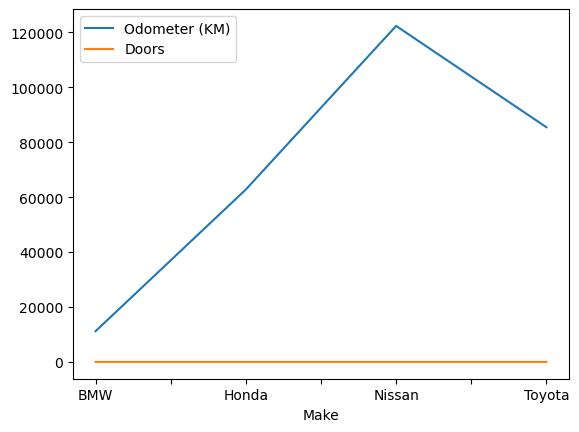

In [10]:
%matplotlib inline
car_sales.groupby("Make").mean(numeric_only=True).plot()

<Axes: xlabel='Make'>

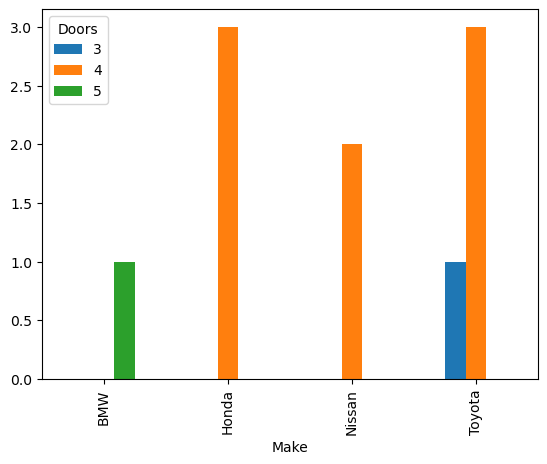

In [11]:
pd.crosstab(car_sales["Make"], car_sales["Doors"]).plot(kind="bar")

In [12]:
if car_sales["Price"].dtype == "object":
    car_sales["Price"] = car_sales["Price"].str.replace(r"[\$\,\.]", "", regex=True).astype(int)
car_sales   

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [13]:
missing_car_sales = pd.read_csv(csv_path / "car-sales-missing-data.csv")

In [14]:
missing_car_sales.Odometer.fillna(missing_car_sales.Odometer.mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10420\2575946480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  missing_car_sales.Odometer.fillna(missing_car_sales.Odometer.mean(), inplace=True)


In [19]:
missing_car_sales.dropna(inplace=True)
missing_car_sales

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [21]:
missing_car_sales["Seats"] = 5
missing_car_sales

,Make,Colour,Odometer,Doors,Price,Seats
0,Toyota,White,150043.000000,4.0,"$4,000",5
1,Honda,Red,87899.000000,4.0,"$5,000",5
2,Toyota,Blue,92302.666667,3.0,"$7,000",5
3,BMW,Black,11179.000000,5.0,"$22,000",5
4,Nissan,White,213095.000000,4.0,"$3,500",5
5,Toyota,Green,92302.666667,4.0,"$4,500",5


In [26]:
import random
def generate_num():
    a = 1.3
    b=4.5
    return random.random() * (b-a) + a
missing_car_sales["Engine Size"] = pd.Series([generate_num()  for _ in range(len(missing_car_sales))])

missing_car_sales

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size
0,Toyota,White,150043.000000,4.0,"$4,000",5,2.267877
1,Honda,Red,87899.000000,4.0,"$5,000",5,2.234309
2,Toyota,Blue,92302.666667,3.0,"$7,000",5,3.445873
3,BMW,Black,11179.000000,5.0,"$22,000",5,1.855126
4,Nissan,White,213095.000000,4.0,"$3,500",5,2.448875
5,Toyota,Green,92302.666667,4.0,"$4,500",5,3.508578


In [31]:
if missing_car_sales.get("Engine Size") is not None:
    missing_car_sales.drop("Engine Size", axis=1, inplace=True)

missing_car_sales

,Make,Colour,Odometer,Doors,Price,Seats
0,Toyota,White,150043.000000,4.0,"$4,000",5
1,Honda,Red,87899.000000,4.0,"$5,000",5
2,Toyota,Blue,92302.666667,3.0,"$7,000",5
3,BMW,Black,11179.000000,5.0,"$22,000",5
4,Nissan,White,213095.000000,4.0,"$3,500",5
5,Toyota,Green,92302.666667,4.0,"$4,500",5


In [33]:
shuffled_missing_car_sales = missing_car_sales.sample(frac=1)
shuffled_missing_car_sales.reset_index()

,index,Make,Colour,Odometer,Doors,Price,Seats
0,3,BMW,Black,11179.000000,5.0,"$22,000",5
1,1,Honda,Red,87899.000000,4.0,"$5,000",5
2,5,Toyota,Green,92302.666667,4.0,"$4,500",5
3,0,Toyota,White,150043.000000,4.0,"$4,000",5
4,2,Toyota,Blue,92302.666667,3.0,"$7,000",5
5,4,Nissan,White,213095.000000,4.0,"$3,500",5


In [34]:

shuffled_missing_car_sales["Odometer"] = shuffled_missing_car_sales["Odometer"].apply(lambda x: x / 1.6)
shuffled_missing_car_sales.rename(columns={"Odometer": "Odometer (Miles)"}, inplace=True)

In [35]:
shuffled_missing_car_sales

,Make,Colour,Odometer (Miles),Doors,Price,Seats
3,BMW,Black,6986.875000,5.0,"$22,000",5
1,Honda,Red,54936.875000,4.0,"$5,000",5
5,Toyota,Green,57689.166667,4.0,"$4,500",5
0,Toyota,White,93776.875000,4.0,"$4,000",5
2,Toyota,Blue,57689.166667,3.0,"$7,000",5
4,Nissan,White,133184.375000,4.0,"$3,500",5
